基于精灵宝可梦的歌词创建云图，模仿了这篇[文章](https://ask.hellobi.com/blog/101python/8225)。

1. 导入 data 文件夹下的所有文件，并计算频率

In [9]:
ls data # 所有歌曲名称

OK!OK!.txt                    我得到神奇宝贝了.txt
Ready Go！Ready Go.txt        来对战吧!.txt


In [10]:
import os

def import_file(file_path):
    lyrics = ''
    
    for f in os.listdir(file_path):
        abs_path = os.path.join(file_path, f)
        
        if os.path.isfile(abs_path):
            print('loading {}'.format(abs_path))
            
            lyrics += open(abs_path, 'r').read()
            
            lyrics += '\n'
    print('done loading')
    return lyrics

In [11]:
lyrics = import_file('data')
# 打印前100个字符串
lyrics[:100] 

loading data/OK!OK!.txt
loading data/Ready Go！Ready Go.txt
loading data/我得到神奇宝贝了.txt
loading data/来对战吧!.txt
done loading


'OK! 向下一个目标前进吧\n\nOK! 和你在一起就没问题\n\nOK! 就算风向改变\n\nOK! 那个梦想也不会改变\n\n来到这里的途中太过专心\n\n而没注意到\n\n自己不知不觉中已拿到了\n\n打开通往新世界之门的'

In [12]:
import jieba.analyse

result = jieba.analyse.textrank(lyrics, topK=1000, withWeight=True)
dic = {}

for (i, j) in result:
    dic[i] = j

print(dic)

{'梦想': 1.0, '前进': 0.9290616649671853, '同伴': 0.6291402441193251, '不会': 0.5912220738430884, '笑容': 0.5862151893878017, '太阳': 0.579184021303684, '出来': 0.5719534703785586, '露脸': 0.5600111849469094, '达成': 0.5581068677735489, '改变': 0.5574431961879549, '攻击': 0.5288858170531807, '大家': 0.5207763931205064, '声音': 0.507674311917415, '天空': 0.5064434716040002, '金色': 0.4983271467983323, '日子': 0.48996944649753854, '银色': 0.48233654735061127, '就算': 0.4760640273789588, '对决': 0.47256528282499305, '月亮': 0.4708543054793271, '朋友': 0.4589661096922648, '追逐': 0.45219058342206714, '说道': 0.45088114053682554, '装傻': 0.4477540229334798, '想要': 0.4406339727641654, '精神': 0.438933732215096, '足以': 0.4388709528142838, '水枪': 0.4381957042009025, '干扰': 0.43712828248304303, '急冻': 0.43572582846806074, '火焰': 0.42949310724845263, '获胜': 0.42572876379931734, '吼声': 0.4199938248945087, '轮流': 0.4193688007293128, '舍身': 0.41643925904140827, '没有': 0.41247474967631503, '风吹': 0.41004261448983725, '舞动': 0.4084562227155327, '连系': 0.408034261

/2. 生成云图

![皮卡丘](pic/皮卡丘.jpeg)

In [13]:
from PIL import Image, ImageSequence
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

image = Image.open('pic/皮卡丘.jpeg')
graph = np.array(image)

wc = WordCloud(font_path = '/Library/Fonts/Songti.ttc',
               background_color='white', max_words=1000, mask=graph)
wc.generate_from_frequencies(dic)
image_color = ImageColorGenerator(graph)

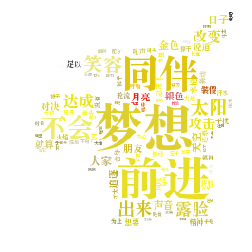

In [14]:
plt.imshow(wc)
plt.imshow(wc.recolor(color_func=image_color))
plt.axis("off")
plt.show()